In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import loss_fn as fn
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
def OLS(target):
    
    def func(X):
        return (1.0 / target.shape[0]) * np.sum((target - X) ** 2)

    return func

In [3]:
x = np.linspace(-1,1,10)
y = 2*x + x**2
print(x)
print(y)

print(OLS(y)(x))
print(grad(OLS(y))(x))

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[-1.         -0.95061728 -0.80246914 -0.55555556 -0.20987654  0.2345679
  0.77777778  1.41975309  2.16049383  3.        ]
0.7021490626428898
[-0.          0.0345679   0.04938272  0.04444444  0.01975309 -0.02469136
 -0.08888889 -0.17283951 -0.27654321 -0.4       ]


In [4]:
from neuralnetwork import NeuralNetwork
from utils import DesignMatrix, ModelDict
from activation import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(200, 4)


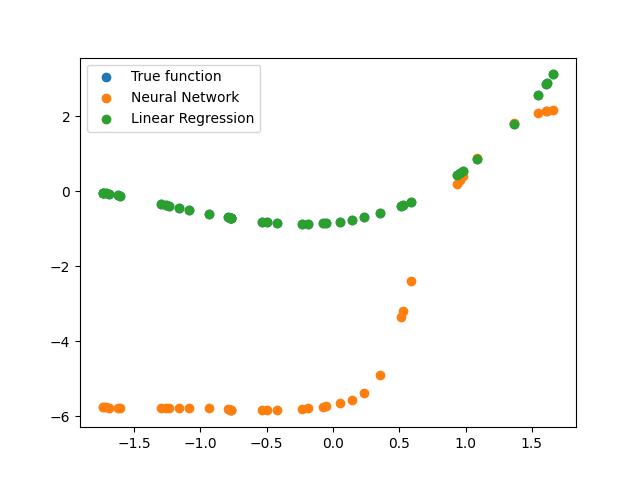

In [5]:
np.random.seed(125)

n = 200
x = np.sort(np.random.uniform(-1, 1, n))
y = 2*x + 9*x**2 + 4*x**3

y = y.reshape(-1, 1)

# print(f'{1:06.2f}')

p = 3
X = DesignMatrix(p, x)
print(X.shape)

md = ModelDict(p+1,
                        [12, 10, 1],
                        [ReLU, ReLU, Linear]
                )
# print(md)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

ols = LinearRegression(fit_intercept=False)
ols.fit(X_train, y_train)
# print(ols.coef_)
# print(ols.predict(X))
# print(y)

test = NeuralNetwork(md, learning_rate=1e-1, loss_fn=OLS)
test.create_layers()
test.train(X_train, y_train, epochs=1000)

pred = test.predict(X_test)
# print(pred)
# print(pred.shape)

plt.scatter(X_test[:,1], y_test, label='True function')
plt.scatter(X_test[:,1], pred, label='Neural Network')
plt.scatter(X_test[:,1], ols.predict(X_test), label='Linear Regression')

plt.legend()
plt.show()